In [1]:
# 標準ライブラリ
import datetime as dt
from datetime import timedelta
from statistics import mean, median,variance,stdev
# サードパーティライブラリ
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import burst_detection as bd

### 定数

In [2]:
CORRECTS = {
    "hk": {
        "start": dt.date(2015, 2, 17), 
        "end": dt.date(2015, 12, 31)
    },
    "tk": {
        "start": dt.date(2015, 2, 17), 
        "end": dt.date(2015, 12, 31)
    },
    "is": {
        "start": dt.date(2015, 2, 17), 
        "end": dt.date(2015, 12, 31)
    }
}

### 連続した日付データ作成
閉区間[start, end]の範囲で出力する

In [3]:
def date_range(start, end):
    for n in range((end - start).days + 1):
        yield start + timedelta(n)

### バースト検出

In [15]:
def burst_detection(target_counts, total_counts):
    #number of target events at each time point
    r = np.array(target_counts, dtype=float)
    #total number of events at each time point
    d = np.array(total_counts, dtype=float)
    #number of time points
    n = len(r)

    q, d, r, p = bd.burst_detection(r,d,n,s=2,gamma=1,smooth_win=1)
    bursts = bd.enumerate_bursts(q, 'burstLabel')

    #find weight of bursts
    weighted_bursts = bd.burst_weights(bursts,r,d,p)

    print('observed probabilities: ') 
    # print(str(r/d) )
    print( 'optimal state sequence: ')
    # print(str(q.T) )
    print( 'baseline probability: ' + str(p[0]) )
    print( 'bursty probability: ' + str(p[1]) )
    
    return(weighted_bursts)

### 評価

In [5]:
def evaluate(dates, correct_dates, burst_result):
    return

### 見頃plot

In [24]:
def plot_migoro(X, Y, correct_dates, rate):
    print("rate: " + str(rate)+"です。")
    
    figure_ = plt.figure(1)  # Figure作成
    axes_ = figure_.add_subplot(111)  # Axes作成
    xaxis_ = axes_.xaxis  # XAxis取得
    xaxis_.get_label()  # X axis label取得
    
    axes_.plot(X, Y)
    return

### F値plot

In [7]:
def plot_fscore(fscores, rates):
    return

# main関数

#### 変数宣言

In [8]:
rates = range(10, 101, 10)
results = []
fscores = []

end = dt.date(2015, 10, 31)
x_axis = [date.day for date in date_range(dt.date(2015, 10, 1), end)]
x_long_axis = [date.day for date in date_range(dt.date(2015, 8, 15), end)]

#### ファイル読み込み

In [9]:
pref = "hk"
flag = "icho"
resultdir = "/Users/daigo/workspace/koyo/result/"

filename = pref + "_" + flag +"_dailycount.txt" # <pref>_<flag>_dailycount.txt
with open(resultdir+filename, "r") as flag_file:
    target_counts = [line.rstrip('\n').split('\t')[1] for line in flag_file.readlines()]

filename = pref + "_total_dailycount.txt"
with open(resultdir+filename, "r") as flag_file:
    total_counts = [line.rstrip('\n').split('\t')[1] for line in flag_file.readlines()]

observed probabilities: 
optimal state sequence: 
baseline probability: 0.00027882931877727066
bursty probability: 0.0005576586375545413
rate: 10です。


TypeError: unhashable type: 'numpy.ndarray'

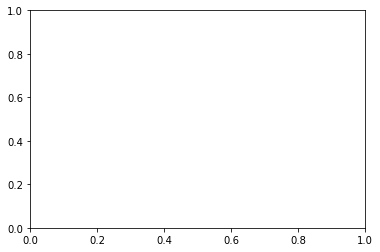

In [25]:
# テスト
result = burst_detection(target_counts, total_counts)
plot_migoro(x_long_axis, result, CORRECTS["hk"], rates[0])

#### 処理部

In [ ]:
for rate in rates:
    result = burst_detection(target_counts, total_counts)
    plot_migoro(x_long_axis, result, rate)
    fscores.append(evaluate(dates, correct_dates, burst_result))
    
# plot_fscore(fscores, rates)